In [1]:
#os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import torch
torch.cuda.empty_cache()
basepath_images= "imagesTr/"

/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#import nibabel as nib
import csv
import imageio
import numpy as np
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
import nibabel as nib 

def preprocess_img(img):
  return (img-img.mean())/(img.std()+1e-16)

fields = ['Name']


new_img_dir = "/home/cds/Desktop/MIG Course project/Self Segmentation project/Using TrUE Net/Image_Training/"
filename = new_img_dir+"A_images.csv"
# writing to csv file 
# with open(filename, 'w') as csvfile:
#   writer = csv.writer(csvfile) 
#   writer.writerow(fields) 
#   for i in range(0, 15):
#     img = nib.load(basepath_images+'BRATS_' + '{0:03}'.format(i+1) + '.nii.gz')
#     img_arr  = img.get_fdata()
#     #print(img_arr.shape) #(240,240,155,4) i.e channel size at end
    
#     for j in range(0, img_arr.shape[2]):
#       im = img_arr[:,:,j,0]
#       im = preprocess_img(im)      
#       #print(im)
#       img_uint8 = im.astype(np.uint8)      
#       file_name = new_img_dir+'image_' + str(i+1) + '_' + str(j+1) + '_.png'
#       imageio.imwrite(file_name, im)       
#       writer.writerow([file_name]) 
    
    
      
      

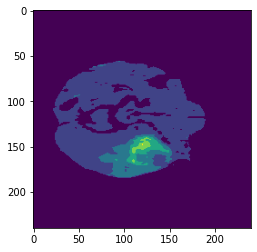

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(plt.imread('Image_Training/image_1_62_.png'))
#print(np.unique(plt.imread('Images_Tr/image_1_62_.png')))

In [4]:
labels_path = "labelsTr/"

In [5]:
import nibabel as nib
import csv
import imageio
import numpy as np

def preprocess_label(label):
  label[label>0] = 1.0
  return label


fields = ['Name']

new_labels_dir = "/home/cds/Desktop/MIG Course project/Self Segmentation project/Using TrUE Net/Labels_Training/"
filename = new_labels_dir+"A_labels.csv"
    
# writing to csv file 
# with open(filename, 'w') as csvfile:
#   writer = csv.writer(csvfile) 
#   writer.writerow(fields) 
#   for i in range(0, 15):
#     img = nib.load(labels_path+'BRATS_' + '{0:03}'.format(i+1) + '.nii.gz')
#     img_arr  = img.get_fdata()
#     #print(img_arr.shape)
#     for j in range(0, img_arr.shape[2]):
#       im = img_arr[:,:,j]
#       im = preprocess_label(im)
#       #print(im.shape)
#       img_uint8 = im.astype(np.uint8)
#       file_name = new_labels_dir+'label_' + str(i+1) + '_' + str(j+1) + '_.png'
#       imageio.imwrite(file_name, im)
#       writer.writerow([file_name])

In [6]:
import matplotlib.pyplot as plt
import numpy as np
test_label = 'Labels_Training/label_2_92_.png'
test_img_label = plt.imread(test_label)
print(np.unique(test_img_label))


[0. 1.]


In [7]:
from __future__ import print_function, division
import os

import pandas as pd
from skimage import io, transform
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")




In [8]:
class BrainTumor(Dataset):
    """Brain Tumor Segmentation Dataset"""

    def __init__(self, csv_file_images, csv_file_labels, root_dir, transform):# transform to tensor
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.names_images = pd.read_csv(csv_file_images)
        self.names_labels = pd.read_csv(csv_file_labels)
        self.root_dirIimgs = root_dir + 'Image_Training/'
        self.root_dirIlabl = root_dir + 'Labels_Training/'
        self.transform = transform

    def __len__(self):
        return len(self.names_images)

    def __getitem__(self, idx):
      

        img_name = os.path.join(self.root_dirIimgs,
                                self.names_images['Name'][idx])
        lab_name = os.path.join(self.root_dirIlabl,
                                self.names_labels['Name'][idx])
        image = io.imread(img_name)
        label = io.imread(lab_name)

        #Data augmentation
        
        if self.transform:  
            image = self.transform(image)
        label = torch.tensor(label).long()
        # label[label<255]=0
        # label = label/255
        # label = label.long()
        return image,label  # transform the images into tensor

In [9]:
import torch
import torch.nn as nn

# class Block(nn.Module):
#     def __init__(self,inChannels, outChannels):
#         super().__init__()
#         self.conv1 = nn.Conv2d(inChannels,outChannels,kernel_size=3)        
#         self.conv2 = nn.Conv2d(outChannels,outChannels,kernel_size=3)
#         self.relu = nn.ReLU()

#     def forward(self,x):
#         # Apply conv1=>conv2 => relu        
#         tmp = self.conv1(x)
#         tmp = self.relu(tmp)
#         tmp = self.conv2(tmp)
#         tmp = self.relu(tmp)        
#         return tmp


In [10]:
# class Encoder(nn.Module):
#     def __init__(self,channels = (1,2,4,8,16)):
#         super().__init__()

#         #Store encoder and maxpooling
#         self.encBlocks = nn.ModuleList(
#             [Block(channels[i],channels[i+1])
#              for i in range(len(channels)-1)])
#         self.pool = nn.MaxPool2d(2)

#     def forward(self,x):
#         blockOutputs = []

#         for i,block in enumerate(self.encBlocks):
#             #Pass inputs through the current encoder block, store the outputs and then apply maxpooling            
#             x = block(x)
#             blockOutputs.append(x)
#             x = self.pool(x)
            
            
#         return blockOutputs
            

In [11]:
from torchvision.transforms import CenterCrop
# class Decoder(nn.Module): #Using convTraspose2D
#     def __init__(self, channels = (16,8,4,2)):
#         super().__init__()
#         #initialize number of channels, upsampler blocks, and decoder blocks
#         self.channels = channels

#         self.upconvs = nn.ModuleList(
#             [nn.ConvTranspose2d(channels[i], channels[i+1], kernel_size=2, stride=2)
#             for i in range(len(channels)-1)]
#         )
#         self.dec_blocks = nn.ModuleList(
#             [Block(channels[i], channels[i+1])
#             for i in range(len(channels)-1)]
#             )
        
#     def forward(self,x, encFeatures):
#         for i in range(len(self.channels)-1):
#            # print(i)
#             x = self.upconvs[i](x)

#             #Crop the current features from encoder blocks and concate them with current upsampled features and pass the out to the center decoder block
#             encfeat = self.crop(encFeatures[i],x) 
#             x = torch.cat([x,encfeat], dim=1) #Dim could be wrong
#             x = self.dec_blocks[i](x)
#         return x
    
#     def crop(self,encFeatures,x):
#         (_,_,H,W) = x.shape
#         encFeatures = CenterCrop([H,W])(encFeatures)

#         return encFeatures
        



In [12]:
from torch.nn import functional as F
# class unet(nn.Module):
#     def __init__(self, encChannels = (1,2,4,8,16,32),
#         decChannels = (32,16,8,4,2), nbClasses =1, retainDim=True, 
#         outSize = (240,240)):
#         super().__init__()
#         self.encoder = Encoder(encChannels)
#         self.decoder = Decoder(decChannels)

#         self.head = nn.Conv2d(decChannels[-1], nbClasses, 1)
#         self.sigmoid = nn.Sigmoid()
#         self.retainDim  = retainDim
#         self.outSize = outSize
                
#     def forward(self,x):
#         encfeatures = self.encoder(x) #Grab features from encoder

#         decfeatures = self.decoder(encfeatures[::-1][0], encfeatures[::-1][1:])

#         map = self.head(decfeatures)

#         if self.retainDim:
#             map = F.interpolate(map,self.outSize)
            
#         map = self.sigmoid(map)
#         return map 


        

        


In [13]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch.nn as nn
import truenet_model_utils

#=========================================================================================
# Triplanar U-Net ensemble network (TrUE-Net) model
# Vaanathi Sundaresan
# 09-03-2021, Oxford
#=========================================================================================

class TrUENet(nn.Module):
    '''
    TrUE-Net model definition
    '''
    def __init__(self, n_channels=1, n_classes=2, init_channels=64, plane='axial', bilinear=False):
        super(TrUENet, self).__init__()
        self.n_channels = n_channels
        self.init_channels = init_channels
        self.n_classes = n_classes
        self.n_layers = 3
        self.bilinear = bilinear

        self.inpconv = truenet_model_utils.OutConv(n_channels, 3, name="inpconv_")
        if plane == 'axial':
            self.convfirst = truenet_model_utils.DoubleConv(3, init_channels, 3, name="convfirst_")
        else:
            self.convfirst = truenet_model_utils.DoubleConv(3, init_channels, 5, name="convfirst_")
        self.down1 = truenet_model_utils.Down(init_channels, init_channels*2, 3, name="down1_")
        self.down2 = truenet_model_utils.Down(init_channels*2, init_channels*4, 3, name="down2_")
        self.down3 = truenet_model_utils.Down(init_channels*4, init_channels*8, 3, name="down3_")
        self.up3 = truenet_model_utils.Up(init_channels*8, init_channels*4, 3, "up1_", bilinear)
        self.up2 = truenet_model_utils.Up(init_channels*4, init_channels*2, 3, "up2_", bilinear)
        self.up1 = truenet_model_utils.Up(init_channels*2, init_channels, 3, "up3_", bilinear)
        self.outconv = truenet_model_utils.OutConv(init_channels, n_classes, name="outconv_")

    def forward(self, x):
        xi = self.inpconv(x)
        x1 = self.convfirst(xi)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x = self.up3(x4, x3)
        x = self.up2(x, x2)
        x = self.up1(x, x1)
        logits = self.outconv(x)
        return logits


In [14]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = TrUENet()
  macs, params = get_model_complexity_info(net, (1, 240 , 240), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))


TrUENet(
  8.563 M, 100.000% Params, 44.002 GMac, 100.000% MACs, 
  (inpconv): OutConv(
    0.0 M, 0.000% Params, 0.0 GMac, 0.001% MACs, 
    (conv): Sequential(
      0.0 M, 0.000% Params, 0.0 GMac, 0.001% MACs, 
      (inpconv_conv): Conv2d(0.0 M, 0.000% Params, 0.0 GMac, 0.001% MACs, 1, 3, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (convfirst): DoubleConv(
    0.039 M, 0.455% Params, 2.252 GMac, 5.119% MACs, 
    (double_conv): Sequential(
      0.039 M, 0.455% Params, 2.252 GMac, 5.119% MACs, 
      (convfirst_conv1): Conv2d(0.002 M, 0.021% Params, 0.103 GMac, 0.235% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (convfirst_bn1): BatchNorm2d(0.0 M, 0.001% Params, 0.007 GMac, 0.017% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (convfirst_relu1): ReLU(0.0 M, 0.000% Params, 0.004 GMac, 0.008% MACs, inplace=True)
      (convfirst_conv2): Conv2d(0.037 M, 0.431% Params, 2.127 GMac, 4.834% MACs, 64, 64, kernel_size=(3, 3), stri

In [15]:
class DiceLoss(nn.Module): #-log(Dice)
    def __init__(self,weights=None, size_average=True):
        super(DiceLoss,self).__init__()

    def forward(self,inputs,targets,smooth=1e-16): #Inputs is the prediction
        # print(inputs.shape)
        # print(targets.shape)
        #Flatten label and prediciton tensors
        #inputs = torch.round(inputs)        
        # inputs[inputs>0.5] = 1.0
        # inputs[inputs<=0.5]=0.0
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        intersection = (inputs*targets).sum()
        union = inputs.sum() + targets.sum()
        #dice_log = -torch.log(2*intersection + 2*smooth) + torch.log(inputs.sum() + targets.sum() + smooth)
        dice_loss = -torch.log(2*intersection+ smooth) + torch.log(union + smooth)        

        return dice_loss
        #return dice_log
    



In [16]:
import os,time
import sklearn.metrics as metrics
import scipy.io
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import tqdm
import torch.nn as nn
from datetime import datetime
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data.sampler import SubsetRandomSampler


#Data augmentations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((240,240)),
    transforms.RandomVerticalFlip(0.4),
    transforms.RandomHorizontalFlip(0.4),
    transforms.Resize((240,240)),
    transforms.ToTensor()
])


print ('*******************************************************')

start_time=time.time()
saveDir='savedRightModels/32fms/lr0.0001_NOepochs_bs128_'
cwd=os.getcwd()
directory=saveDir+datetime.now().strftime("%d%b_%I%M%P_")+'model'
print('Model will be saved to  :', directory)
#wandb.init()

if not os.path.exists(directory):
    os.makedirs(directory)

a = 'Image_Training/A_images.csv' # define the path of csv file of images
b = 'Labels_Training/A_labels.csv' # define the path of csv files of labels
c = '' # define the path of root directory of images


# make the data iterator for training data
train_data = BrainTumor(a, b, c,  transforms.ToTensor())
batchSize = 64
learning_rate = 5e-4
validation_split = 0.2

dataset_size = len(train_data)
indices = list(range(dataset_size))
split = int(np.floor(validation_split*dataset_size))

train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batchSize,  num_workers=2, sampler = train_sampler)
validloader = torch.utils.data.DataLoader(train_data, batch_size=batchSize,  num_workers=2, sampler = valid_sampler)

print('----------------------------------------------------------')
print("Number of training samples "+str(dataset_size-split))
print("Number of validation samples "+str(split))
#%%class BrainTumor(Dataset)
# Create the object for the network

  
net = TrUENet()
#wandb.watch(net)
#CUDA_LAUNCH_BLOCKING=0
net.cuda()


# Define the optimizer
optimizer = optim.Adam(net.parameters(),lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, step_size=33, gamma=0.1)

# Define the loss function
criterion = nn.CrossEntropyLoss()#DiceLoss() #Add custom loss and change later
#criterion = nn.CrossEntropyLoss()


# Iterate over the training dataset
train_loss = []
valid_loss = []
sens = []
spec = []
acc  = []
img_rows = 512
img_cols = 512
numImgs  = 5 # should be same as mini batch size
epochs = 50
torch.autograd.set_detect_anomaly(True)
min_valid_loss = np.inf
for j in range(epochs):  
    # Start epochs   
    runtrainloss = 0
    net.train() 
    for i,data in tqdm.tqdm(enumerate(trainloader)): 
        # start iterations
        images,trainLabels = Variable(data[0]),Variable(data[1])
        
        
        images  = images.cuda()
        trainLabels = trainLabels.cuda()
        #print(trainLabels.shape)  
        #print(np.unique(trainLabels))      
        # make forward pass      
        output = net(images)
       
        #compute loss
        print(output.shape)
        loss   = criterion(output, trainLabels.squeeze())        
                
        # make gradients zero
        optimizer.zero_grad()
        
        # back propagate
        loss.backward()
        
        # Accumulate loss for current minibatch
        runtrainloss += loss.item()        
        
        # update the parameters
        optimizer.step()       

        #wandb.log({"-log(Dice)":loss, "Dice":torch.exp(-loss)})
        
       
    # print loss after every epoch
    net.eval()
    validloss=0.0
    
    for data,labels in validloader:
        if torch.cuda.is_available:
            data,labels = data.cuda(), labels.cuda()
        target = net(data)
        loss = criterion(target, labels.squeeze())
        validloss += loss.item()


    print('Training - Epoch {}/{}, loss:{:.4f} '.format(j+1, epochs, runtrainloss/len(trainloader)))
    train_loss.append(runtrainloss/len(trainloader))
    valid_loss.append(validloss/len(validloader))
    print('Validation loss {:.4f}'.format(validloss/len(validloader)))
    
       
    # Take a step for scheduler
    #scheduler.step()
    
    
    #save the model  
    avg_valid_loss = validloss/len(validloader)

    if avg_valid_loss < min_valid_loss and avg_valid_loss>0:
        print("Current valid loss {:.4f} less than minimum valid loss {:.4f}".format(avg_valid_loss, min_valid_loss))
        min_valid_loss = avg_valid_loss        
        print("Saving model")
        torch.save(net.state_dict(), os.path.join(directory,"Unet_Epochs"+str(j+1)+"_validLoss{:.4f}_model.pth".format(min_valid_loss)))
    #torch.save(net.state_dict(),os.path.join(directory,"Unet_" + str(j+1) +"_model.pth"))
    if avg_valid_loss<0:
        epochs = j
        print("Model has overfitted a lot")
        print("Stopping training")
        break
    if avg_valid_loss < 0.01:
        epochs = j+1
        print("Done training.")
        break
    	    

# Save the train stats

np.save(directory+'/trnloss.npy',np.array(train_loss) )


# plot the training loss

# x = range(epochs)
# plt.figure()

# plt.xlabel('epochs')
# plt.ylabel('Train Loss ') 
# plt.legend(loc="upper left")  
# plt.show()
             

*******************************************************
Model will be saved to  : savedRightModels/32fms/lr0.0001_NOepochs_bs128_20Apr_1122pm_model
----------------------------------------------------------
Number of training samples 1860
Number of validation samples 465


0it [00:00, ?it/s]/opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/cuda/NLLLoss2d.cu:95: nll_loss2d_forward_kernel: block: [50,0,0], thread: [608,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/cuda/NLLLoss2d.cu:95: nll_loss2d_forward_kernel: block: [50,0,0], thread: [128,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/cuda/NLLLoss2d.cu:95: nll_loss2d_forward_kernel: block: [50,0,0], thread: [129,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/cuda/NLLLoss2d.cu:95: nll_loss2d_forward_kernel: block: [50,0,0], thread: [130,0,0] Assertion `t >= 0 && t < n_classes` failed.
/opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/cuda/NLLLoss2d.cu:95: nll_loss2d_forward_kernel: block: [50,0,0], thread: [131,0,0] Assertion `t >= 0 && t < n_classes` faile

torch.Size([64, 1, 240, 240])


ntent
  File "/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    result = self._run_cell(
  File "/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2900, in _run_cell
    return runner(coro)
  File "/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "/home/cds/anaconda3/envs/MIG_Course/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell_async
    has_raised = await self.r

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

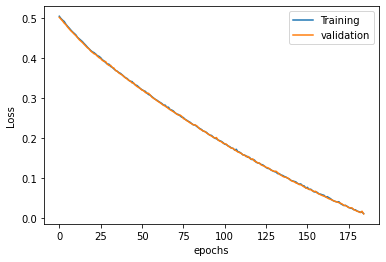

In [ ]:
#Plot the loss
x = range(epochs)
plt.figure()
plt.plot(x,train_loss,label='Training')
plt.plot(x,valid_loss,label='validation')
plt.xlabel('epochs')
plt.ylabel('Loss ') 
plt.legend(loc="upper right")  
plt.show()

In [ ]:
# #Single testing
# path = "savedRightModels/lr0.0001_200epochs_bs256/BEst_Model_30Dec_0733pm_model/Unet_Epochs99_validLoss0.0424_model.pth"
# checkpoint = torch.load(path)
# net = unet()
# net.load_state_dict(checkpoint)
# net.cuda()
# net.eval()
# target = 0
# for data,labels in validloader:   
#     if torch.cuda.is_available:
#         data,labels = data.cuda(), labels.cuda()
#     target = net(data)        
#     #target_round = torch.round(target)    
#     #target_round = target_round.cpu().detach().numpy()  
#     target = target.cpu().detach().numpy()    
#     print(target.shape)
#     plt.imshow(target[1,0,:,:])

    
#     #loss = criterion(target, labels.squeeze())
    
#     #print(1-loss)
#     plt.imshow(data.cpu().detach().numpy()[1,0,:,:], cmap="bone", origin="lower")
#     plt.title("MRI")    
#     plt.show()

#     plt.imshow(labels.cpu().detach().numpy()[1,:,:], cmap="bone", origin="lower")
#     plt.title("Ground Truth")
#     plt.show()
#     #plt.imshow(target[0,0,:,:], cmap="bone",origin="lower")
#     break
# #target[target>0.5]=1.0
# target = target[1,0,:,:]
# print(target.shape)
# plt.imshow(target, cmap="bone", origin="lower")
# plt.title("predicton")
# plt.show()


    
